In [1]:
!pip install fuzzywuzzy

In [2]:
import warnings #  for avoid unwanted warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML # for HTMl tag use in python

In [3]:
import pandas as pd
import numpy as np
import re
from random import choice
import os
import pandas as pd
from fuzzywuzzy import fuzz

In [4]:
data = pd.read_csv('dataset_tennis.csv',index_col=0)
data.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,Comment
0,1,Brisbane,Brisbane International,2017-01-01,ATP250,Outdoor,Hard,1st Round,3,Thompson J.,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed
1,1,Brisbane,Brisbane International,2017-01-02,ATP250,Outdoor,Hard,1st Round,3,Mahut N.,...,3.0,6.0,4.0,NaN,NaN,NaN,NaN,2.0,1.0,Completed
2,1,Brisbane,Brisbane International,2017-01-02,ATP250,Outdoor,Hard,1st Round,3,Ferrer D.,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed
3,1,Brisbane,Brisbane International,2017-01-02,ATP250,Outdoor,Hard,1st Round,3,Edmund K.,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed
4,1,Brisbane,Brisbane International,2017-01-02,ATP250,Outdoor,Hard,1st Round,3,Dimitrov G.,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed


In [5]:
data["Comment"].value_counts()

Completed       11846
Retired           309
Walkover           74
Awarded             2
Disqualified        1
Sched               1
Rrtired             1
Name: Comment, dtype: int64

- Fixeamos un poco la columna 'Comment' para contabilizar por cada tipo de finalización de partido jugado.

In [6]:
data.loc[(data.loc[:,"Comment"] == "Rrtired"),"Comment"] = "Retired"

In [7]:
comment_mask=(data.loc[:,"Comment"] == "Completed")
data=data[comment_mask]

In [8]:
data.columns

Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'WPts', 'LPts',
       'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets',
       'Lsets', 'Comment'],
      dtype='object')

In [9]:
data[['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface','Round', 'Best of']].head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of
0,1,Brisbane,Brisbane International,2017-01-01,ATP250,Outdoor,Hard,1st Round,3
1,1,Brisbane,Brisbane International,2017-01-02,ATP250,Outdoor,Hard,1st Round,3
2,1,Brisbane,Brisbane International,2017-01-02,ATP250,Outdoor,Hard,1st Round,3
3,1,Brisbane,Brisbane International,2017-01-02,ATP250,Outdoor,Hard,1st Round,3
4,1,Brisbane,Brisbane International,2017-01-02,ATP250,Outdoor,Hard,1st Round,3


In [10]:
data["Location"].value_counts()

Melbourne    867
Paris        856
New York     731
London       550
Miami        369
            ... 
Parma         26
Mallorca      25
Sardinia      25
Zhuhai        25
Turin         14
Name: Location, Length: 83, dtype: int64

In [11]:
# data.drop(['ATP','Location','Tournament','Round','Best of','Series'],axis=1,inplace=True)
data.drop(['ATP','Best of','Series'],axis=1,inplace=True)

In [12]:
data.head()

,Location,Tournament,Date,Court,Surface,Round,Winner,Loser,WRank,LRank,...,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,Comment
0,Brisbane,Brisbane International,2017-01-01,Outdoor,Hard,1st Round,Thompson J.,Ymer E.,79.0,160.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed
1,Brisbane,Brisbane International,2017-01-02,Outdoor,Hard,1st Round,Mahut N.,Robert S.,39.0,54.0,...,3.0,6.0,4.0,NaN,NaN,NaN,NaN,2.0,1.0,Completed
2,Brisbane,Brisbane International,2017-01-02,Outdoor,Hard,1st Round,Ferrer D.,Tomic B.,21.0,26.0,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed
3,Brisbane,Brisbane International,2017-01-02,Outdoor,Hard,1st Round,Edmund K.,Escobedo E.,45.0,141.0,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed
4,Brisbane,Brisbane International,2017-01-02,Outdoor,Hard,1st Round,Dimitrov G.,Johnson S.,17.0,33.0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed


#### Creamos variables para los ganadores y perdedores.

In [13]:
win_lose_data = data[['Winner', 'Loser', 'WRank', 'LRank', 'WPts', 'LPts','W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets','Lsets']]
winner_data = win_lose_data[['WRank','WPts','W1','W2','W3','W4','W5','Wsets']]
loser_data = win_lose_data[['LRank','LPts','L1','L2','L3','L4','L5','Lsets']]


#### De las columnas de `'player_a'` y `'player_b'` para la segunda randomizamos los nombres

In [14]:
player_a = win_lose_data[["Winner","Loser"]].apply(lambda x: choice(x),axis=1)
player_a.head()
win_lose_data["player_a"] = player_a
win_lose_data["player_a"].head()

0        Ymer E.
1       Mahut N.
2       Tomic B.
3    Escobedo E.
4     Johnson S.
Name: player_a, dtype: object

In [15]:
win_lose_data["player_b"]=np.where((win_lose_data["player_a"]==win_lose_data["Winner"]),win_lose_data["Loser"],win_lose_data["Winner"])
win_lose_data["player_b"].head()

0    Thompson J.
1      Robert S.
2      Ferrer D.
3      Edmund K.
4    Dimitrov G.
Name: player_b, dtype: object

In [16]:
win_lose_data[["Winner","Loser","player_a","player_b"]].head()

,Winner,Loser,player_a,player_b
0,Thompson J.,Ymer E.,Ymer E.,Thompson J.
1,Mahut N.,Robert S.,Mahut N.,Robert S.
2,Ferrer D.,Tomic B.,Tomic B.,Ferrer D.
3,Edmund K.,Escobedo E.,Escobedo E.,Edmund K.
4,Dimitrov G.,Johnson S.,Johnson S.,Dimitrov G.


In [17]:
col_a=['A_Rank', 'A_Pts', 'A_Set_1', 'A_Set_2', 'A_Set_3', 'A_Set_4', 'A_Set_5', 'A_Sets_won']
col_b=['B_Rank', 'B_Pts', 'B_Set_1', 'B_Set_2', 'B_Set_3', 'B_Set_4', 'B_Set_5', 'B_Sets_won']
col_ = ["Rank","Pts","Set_1","Set_2","Set_3","Set_4","Set_5","Sets_won"]

In [18]:
for i in range(len(col_a)):
    temp_col_name = col_a[i]
    temp_winner = winner_data.iloc[:,i]
    temp_loser = loser_data.iloc[:,i] 
    win_lose_data[temp_col_name] = np.where((win_lose_data["player_a"]==win_lose_data["Winner"]),temp_winner,temp_loser)    

In [19]:
for i in range(len(col_b)):
    temp_col_name = col_b[i]
    temp_winner = winner_data.iloc[:,i]
    temp_loser = loser_data.iloc[:,i] 
    win_lose_data[temp_col_name] = np.where((win_lose_data["player_b"]==win_lose_data["Winner"]),temp_winner,temp_loser)

In [20]:
win_lose_data.head()

,Winner,Loser,WRank,LRank,WPts,LPts,W1,L1,W2,L2,...,A_Set_5,A_Sets_won,B_Rank,B_Pts,B_Set_1,B_Set_2,B_Set_3,B_Set_4,B_Set_5,B_Sets_won
0,Thompson J.,Ymer E.,79.0,160.0,689.0,372.0,6.0,3.0,6.0,2.0,...,NaN,0.0,79.0,689.0,6.0,6.0,NaN,NaN,NaN,2.0
1,Mahut N.,Robert S.,39.0,54.0,1102.0,854.0,4.0,6.0,6.0,3.0,...,NaN,2.0,54.0,854.0,6.0,3.0,4.0,NaN,NaN,1.0
2,Ferrer D.,Tomic B.,21.0,26.0,1785.0,1465.0,6.0,3.0,7.0,5.0,...,NaN,0.0,21.0,1785.0,6.0,7.0,NaN,NaN,NaN,2.0
3,Edmund K.,Escobedo E.,45.0,141.0,1001.0,443.0,7.0,6.0,7.0,6.0,...,NaN,0.0,45.0,1001.0,7.0,7.0,NaN,NaN,NaN,2.0
4,Dimitrov G.,Johnson S.,17.0,33.0,2035.0,1320.0,6.0,2.0,6.0,3.0,...,NaN,0.0,17.0,2035.0,6.0,6.0,NaN,NaN,NaN,2.0


In [21]:
win_lose_data.columns

Index(['Winner', 'Loser', 'WRank', 'LRank', 'WPts', 'LPts', 'W1', 'L1', 'W2',
       'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets', 'Lsets', 'player_a',
       'player_b', 'A_Rank', 'A_Pts', 'A_Set_1', 'A_Set_2', 'A_Set_3',
       'A_Set_4', 'A_Set_5', 'A_Sets_won', 'B_Rank', 'B_Pts', 'B_Set_1',
       'B_Set_2', 'B_Set_3', 'B_Set_4', 'B_Set_5', 'B_Sets_won'],
      dtype='object')

In [22]:
win_lose_data["Rank_dif_AB"] = win_lose_data.A_Rank - win_lose_data.B_Rank	
win_lose_data["Pts_dif_AB"] = win_lose_data.A_Pts-win_lose_data.B_Pts

In [23]:
data.columns

Index(['Location', 'Tournament', 'Date', 'Court', 'Surface', 'Round', 'Winner',
       'Loser', 'WRank', 'LRank', 'WPts', 'LPts', 'W1', 'L1', 'W2', 'L2', 'W3',
       'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets', 'Lsets', 'Comment'],
      dtype='object')

In [24]:
data_2 = data.merge(win_lose_data).drop(['A_Rank','B_Rank','A_Pts','B_Pts','Loser', 'WRank', 'LRank', 'WPts', 'LPts','W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets','Lsets'],axis=1)

In [25]:
data_2.head()

,Location,Tournament,Date,Court,Surface,Round,Winner,Comment,player_a,player_b,...,A_Set_5,A_Sets_won,B_Set_1,B_Set_2,B_Set_3,B_Set_4,B_Set_5,B_Sets_won,Rank_dif_AB,Pts_dif_AB
0,Brisbane,Brisbane International,2017-01-01,Outdoor,Hard,1st Round,Thompson J.,Completed,Ymer E.,Thompson J.,...,NaN,0.0,6.0,6.0,NaN,NaN,NaN,2.0,81.0,-317.0
1,Brisbane,Brisbane International,2017-01-02,Outdoor,Hard,1st Round,Mahut N.,Completed,Mahut N.,Robert S.,...,NaN,2.0,6.0,3.0,4.0,NaN,NaN,1.0,-15.0,248.0
2,Brisbane,Brisbane International,2017-01-02,Outdoor,Hard,1st Round,Ferrer D.,Completed,Tomic B.,Ferrer D.,...,NaN,0.0,6.0,7.0,NaN,NaN,NaN,2.0,5.0,-320.0
3,Brisbane,Brisbane International,2017-01-02,Outdoor,Hard,1st Round,Edmund K.,Completed,Escobedo E.,Edmund K.,...,NaN,0.0,7.0,7.0,NaN,NaN,NaN,2.0,96.0,-558.0
4,Brisbane,Brisbane International,2017-01-02,Outdoor,Hard,1st Round,Dimitrov G.,Completed,Johnson S.,Dimitrov G.,...,NaN,0.0,6.0,6.0,NaN,NaN,NaN,2.0,16.0,-715.0


In [26]:
# data_2.to_csv('dataset_tennis_2.csv')

In [27]:
# victorias ultimas 1/3/5
# victorias contra mismo ultimas 1/3/5
# sets jugados ultimos 1/3/5 partidos


In [28]:
mask_winner_a = (data_2['Winner'] == data_2['player_a'])

In [29]:
data_2['Winner_a'] = np.NaN
data_2['Winner_a'].fillna(0,inplace=True)
data_2.loc[mask_winner_a,'Winner_a'] = 1

In [30]:
# quedó bien balanceado A y B
data_2['Winner_a'].value_counts()

1.0    5989
0.0    5857
Name: Winner_a, dtype: int64

#### Completamos Sets vacios con "0"

In [31]:
columnas_sets= ['A_Set_1', 'A_Set_2', 'A_Set_3', 'A_Set_4','A_Set_5', 'B_Set_1', 'B_Set_2','B_Set_3', 'B_Set_4', 'B_Set_5']
data_2[columnas_sets] = data_2[columnas_sets].fillna(0)

### Agregamos la cantidad de games ganados por cada jugador

In [32]:
# data_2['A_games_won'] = data_2['A_Set_1']+ data_2['A_Set_2']+ data_2['A_Set_3']+ data_2['A_Set_4']+data_2['A_Set_5']

In [33]:
# data_2['B_games_won'] = data_2['B_Set_1']+ data_2['B_Set_2']+ data_2['B_Set_3']+ data_2['B_Set_4']+data_2['B_Set_5']

### Construimos la columna Target

In [34]:
data_2['Target'] = 'B'

In [35]:
mask_a = data_2['Winner'] == data_2 ['player_a']

In [36]:
data_2.loc[mask_a,'Target'] = 'A'

In [37]:
data_2["A_sets_played"] = data_2.B_Sets_won + data_2.A_Sets_won
data_2["B_sets_played"] = data_2.B_Sets_won + data_2.A_Sets_won

In [38]:
data_2["Date"] = pd.to_datetime(data_2.Date)

### Ordenamos el Dataset por Fecha (más antiguo a más reciente)

In [39]:
# Ordenamos el dataframe por Fecha
data_2 = data_2.sort_values(by='Date')

#### Completamos Cantidad de Sets Ganados

In [40]:
data_2["A_sets_played"] = data_2.B_Sets_won + data_2.A_Sets_won
data_2["B_sets_played"] = data_2.B_Sets_won + data_2.A_Sets_won

In [41]:
data_2["Date"] = pd.to_datetime(data_2.Date)

In [42]:
data_2.head()

,Location,Tournament,Date,Court,Surface,Round,Winner,Comment,player_a,player_b,...,B_Set_3,B_Set_4,B_Set_5,B_Sets_won,Rank_dif_AB,Pts_dif_AB,Winner_a,Target,A_sets_played,B_sets_played
0,Brisbane,Brisbane International,2017-01-01,Outdoor,Hard,1st Round,Thompson J.,Completed,Ymer E.,Thompson J.,...,0.0,0.0,0.0,2.0,81.0,-317.0,0.0,B,2.0,2.0
56,Doha,Qatar Exxon Mobil Open,2017-01-02,Outdoor,Hard,1st Round,Djokovic N.,Completed,Djokovic N.,Struff J.L.,...,0.0,0.0,0.0,0.0,-61.0,11022.0,1.0,A,2.0,2.0
55,Doha,Qatar Exxon Mobil Open,2017-01-02,Outdoor,Hard,1st Round,Almagro N.,Completed,Almagro N.,Lorenzi P.,...,3.0,0.0,0.0,1.0,4.0,-77.0,1.0,A,3.0,3.0
54,Doha,Qatar Exxon Mobil Open,2017-01-02,Outdoor,Hard,1st Round,Vesely J.,Completed,Vesely J.,Yuksel A.,...,0.0,0.0,0.0,0.0,-452.0,775.0,1.0,A,2.0,2.0
53,Doha,Qatar Exxon Mobil Open,2017-01-02,Outdoor,Hard,1st Round,Brown D.,Completed,Bagnis F.,Brown D.,...,6.0,0.0,0.0,2.0,-16.0,125.0,0.0,B,3.0,3.0


In [43]:
# [('Location', 0), ('Tournament', 1), ('Date', 2), ('Court', 3), ('Surface', 4), ('Round', 5),
#  ('Winner', 6), ('Comment', 7), ('player_a', 8), ('player_b', 9), ('A_Rank', 10), ('A_Pts', 11),
#  ('A_Set_1', 12), ('A_Set_2', 13), ('A_Set_3', 14), ('A_Set_4', 15), ('A_Set_5', 16), ('A_Sets_won', 17),
#  ('B_Rank', 18), ('B_Pts', 19), ('B_Set_1', 20), ('B_Set_2', 21), ('B_Set_3', 22), ('B_Set_4', 23),
#  ('B_Set_5', 24), ('B_Sets_won', 25), ('Winner_a', 26), ('A_games_won', 27), ('B_games_won', 28), ('Target', 29), 
#  ('A_sets_played', 30),
#  ('B_sets_played', 31), ('Player_a+b', 32)]

### Construct a tuple for the two players playing and filter them alphabetically

In [44]:
data_2["player_tuple"] = list(zip(data_2.player_a,data_2.player_b))

In [45]:
data_2["player_tuple"] = data_2["player_tuple"].apply(lambda x: tuple(sorted(list(x))))

In [46]:
data_2["player_tuple"]

0             (Thompson J., Ymer E.)
56        (Djokovic N., Struff J.L.)
55          (Almagro N., Lorenzi P.)
54            (Vesely J., Yuksel A.)
53             (Bagnis F., Brown D.)
                    ...             
11785      (Norrie C., Tsitsipas S.)
11844       (Martinez P., Tabilo A.)
11843    (Baez S., Ramos-Vinolas A.)
11787          (Nadal R., Norrie C.)
11845         (Baez S., Martinez P.)
Name: player_tuple, Length: 11846, dtype: object

### Construct a dictionary to keep track of individual players win details

In [47]:
names_a = list(np.unique(data_2.player_a))
names_b = list(np.unique(data_2.player_b))
names_unique = list(np.unique(names_a+names_b))


In [48]:
players_dict={name:{"last_game_won":0,"games_won_last_3":list(),"games_won_last_5":list(),"streak":0} for name in names_unique}

In [49]:
tmp_a = "_player_a"
tmp_b = "_player_b"

last_1 = "last_game_won"
last_3 = "games_won_last_3"
last_5 = "games_won_last_5"
streak = "streak"

tmp_last_1_a = last_1 + tmp_a
tmp_last_3_a = last_3 + tmp_a
tmp_last_5_a = last_5 + tmp_a
tmp_streak_a = streak + tmp_a

tmp_last_1_b = last_1 + tmp_b
tmp_last_3_b = last_3 + tmp_b
tmp_last_5_b = last_5 + tmp_b
tmp_streak_b = streak + tmp_b


In [50]:
def set_dict_winner(player):
    '''
    update dict winner
    '''
    players_dict[player][last_1] = 1
    
    players_dict[player][last_3].append(1)   
    players_dict[player][last_3] = players_dict[player][last_3][-3:]
    
    players_dict[player][last_5].append(1)
    players_dict[player][last_5] = players_dict[player][last_5][-5:]
    
    players_dict[player][streak] +=1
    
    
def set_dict_loser(player):
    '''
    update dict loser
    '''
    players_dict[player][last_1] = 0
    
    players_dict[player][last_3].append(0)   
    players_dict[player][last_3] = players_dict[player][last_3][-3:]
    
    players_dict[player][last_5].append(0)
    players_dict[player][last_5] = players_dict[player][last_5][-5:]  
    players_dict[player][streak] = 0

In [51]:
def zero_div_error(x):
    '''
    soluciona problema cuando la lista esta vacia
    '''
    try:
        return sum(x)/len(x)*100
    except ZeroDivisionError:
        return 0

In [52]:
%%capture
for i,j in data_2.iterrows():
    
    tmp_winner = j[6]
    tmp_player_a = j[8]
    tmp_player_b = j[9]
        
    #wins 1/3/5    
    data_2.loc[i, tmp_last_1_a] = players_dict[tmp_player_a][last_1] 
    data_2.loc[i, tmp_last_3_a] = zero_div_error(players_dict[tmp_player_a][last_3])
    data_2.loc[i, tmp_last_5_a] = zero_div_error(players_dict[tmp_player_a][last_5])

    data_2.loc[i,tmp_last_1_b] = players_dict[tmp_player_b][last_1] 
    data_2.loc[i,tmp_last_3_b] = zero_div_error(players_dict[tmp_player_b][last_3])
    data_2.loc[i,tmp_last_5_b] = zero_div_error(players_dict[tmp_player_b][last_5])
    
    #streaks
    tmp_streak_a
    data_2.loc[i,tmp_streak_a] = players_dict[tmp_player_a][streak] 
    data_2.loc[i,tmp_streak_b] = players_dict[tmp_player_b][streak] 
    
    if tmp_winner == tmp_player_a: 
        set_dict_winner(tmp_player_a)
        set_dict_loser(tmp_player_b)
    else:
        set_dict_winner(tmp_player_b)
        set_dict_loser(tmp_player_a)


In [53]:
data_2[['player_a', 'player_b','Winner','last_game_won_player_a', 'games_won_last_3_player_a',
       'games_won_last_5_player_a', 'last_game_won_player_b',
       'games_won_last_3_player_b', 'games_won_last_5_player_b','streak_player_a', 'streak_player_b']].head()

,player_a,player_b,Winner,last_game_won_player_a,games_won_last_3_player_a,games_won_last_5_player_a,last_game_won_player_b,games_won_last_3_player_b,games_won_last_5_player_b,streak_player_a,streak_player_b
0,Ymer E.,Thompson J.,Thompson J.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56,Djokovic N.,Struff J.L.,Djokovic N.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55,Almagro N.,Lorenzi P.,Almagro N.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,Vesely J.,Yuksel A.,Vesely J.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53,Bagnis F.,Brown D.,Brown D.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
data_2.columns

Index(['Location', 'Tournament', 'Date', 'Court', 'Surface', 'Round', 'Winner',
       'Comment', 'player_a', 'player_b', 'A_Set_1', 'A_Set_2', 'A_Set_3',
       'A_Set_4', 'A_Set_5', 'A_Sets_won', 'B_Set_1', 'B_Set_2', 'B_Set_3',
       'B_Set_4', 'B_Set_5', 'B_Sets_won', 'Rank_dif_AB', 'Pts_dif_AB',
       'Winner_a', 'Target', 'A_sets_played', 'B_sets_played', 'player_tuple',
       'last_game_won_player_a', 'games_won_last_3_player_a',
       'games_won_last_5_player_a', 'last_game_won_player_b',
       'games_won_last_3_player_b', 'games_won_last_5_player_b',
       'streak_player_a', 'streak_player_b'],
      dtype='object')

### Construct a dictionary to keep track of matches between two players

In [55]:
#data_2["player_tuple"]

In [56]:
matches_unique = np.unique(data_2.player_tuple)

In [57]:
matches_unique[0]

('Ahouda A.', 'Granollers M.')

In [58]:
data_2.columns.get_loc('player_tuple')

28

In [59]:
one_v_one_matches = {pair:{"last_match":None,"hist_winner":list()} for pair in matches_unique}

In [60]:
def a_win_rate(tmp_a:str(),hist_games:list()):
    '''
    genera el winrate para a vs b
    '''
    a_wins = hist_games.count(tmp_a)
    n_games = len(hist_games)
    try:
        win_rate = a_wins/n_games
    except ZeroDivisionError:
        win_rate = 0
    return win_rate
    
    

In [61]:
%%capture
loc_tuple = data_2.columns.get_loc('player_tuple')
for i,j in data_2.iterrows():
    tmp_winner = j[6]
    tmp_player_a = j[8]
    tmp_player_b = j[9]
    tmp_tuple= j[loc_tuple]
    
    #last_game
    if one_v_one_matches[tmp_tuple]["last_match"] == tmp_player_a:
        data_2.loc[i, "who_won_last_game"] = "A"  
    elif one_v_one_matches[tmp_tuple]["last_match"] == tmp_player_b:
        data_2.loc[i, "who_won_last_game"] = "B"
    else:
        data_2.loc[i, "who_won_last_game"] = 0
    
    
    data_2.loc[i, "A_win_rate_vs_B"] = a_win_rate(tmp_player_a,one_v_one_matches[tmp_tuple]["hist_winner"])
    data_2.loc[i, "B_win_rate_vs_A"] = a_win_rate(tmp_player_b,one_v_one_matches[tmp_tuple]["hist_winner"])
    
    
    #update dict
    one_v_one_matches[tmp_tuple]["last_match"] = tmp_winner 
    one_v_one_matches[tmp_tuple]["hist_winner"].append(tmp_winner)
    
    
    

In [62]:
data_2["who_won_last_game"].head()

0     0
56    0
55    0
54    0
53    0
Name: who_won_last_game, dtype: object

In [63]:
data_2.loc[data_2["who_won_last_game"].isna(),"who_won_last_game"] = 0


In [64]:
tmp_df = pd.get_dummies(data_2.who_won_last_game,drop_first=True)


In [65]:
data_2.drop("who_won_last_game",axis=1,inplace=True)

In [66]:
data_2["A_won_last"] = tmp_df["A"]
data_2["B_won_last"] = tmp_df["B"]


In [67]:
data_2.columns

Index(['Location', 'Tournament', 'Date', 'Court', 'Surface', 'Round', 'Winner',
       'Comment', 'player_a', 'player_b', 'A_Set_1', 'A_Set_2', 'A_Set_3',
       'A_Set_4', 'A_Set_5', 'A_Sets_won', 'B_Set_1', 'B_Set_2', 'B_Set_3',
       'B_Set_4', 'B_Set_5', 'B_Sets_won', 'Rank_dif_AB', 'Pts_dif_AB',
       'Winner_a', 'Target', 'A_sets_played', 'B_sets_played', 'player_tuple',
       'last_game_won_player_a', 'games_won_last_3_player_a',
       'games_won_last_5_player_a', 'last_game_won_player_b',
       'games_won_last_3_player_b', 'games_won_last_5_player_b',
       'streak_player_a', 'streak_player_b', 'A_win_rate_vs_B',
       'B_win_rate_vs_A', 'A_won_last', 'B_won_last'],
      dtype='object')

# Fuzzy Matching 
### Ahora lo comentamos ya que el resultado de esto lo exportamos a un excel para no tener que ejecutarlo cada vez que corremos la notebook

In [68]:
# data_player = pd.read_csv('atp_players.csv')
# data_player.info()

In [69]:
# data_player['name_first'] = data_player['name_first'].astype('str')
# data_player['name_last'] = data_player['name_last'].astype('str')
# data_player['full name'] = data_player.apply(lambda x: x['name_last'] + " " +x['name_first'][:1]+".",axis=1)

In [70]:
# data_player.drop(['player_id','name_first','name_last','wikidata_id'],axis=1,inplace=True)
# # data_player = data_player.dropna()
# data_player.drop_duplicates('full name',inplace=True)
# data_player.set_index('full name',inplace=True)

In [71]:
# data_player.head()

In [72]:
# # # Clean player lists
# Player_A_cleaned = [player for player in data_2["player_a"].unique() if not(pd.isnull(player))]
# Player_B_cleaned = [player for player in data_2["player_b"].unique() if not(pd.isnull(player))]
# Player_data_cleaned = [player for player in data_player.index]

In [73]:
# # Perform fuzzy string matching
# tuples_list = [max([(fuzz.token_set_ratio(i,j),j) for j in Player_data_cleaned]) for i in Player_A_cleaned]

# # Unpack list of tuples into two lists
# similarity_score, fuzzy_match = map(list,zip(*tuples_list))

# # Create pandas DataFrame
# player_a_fuzzy = pd.DataFrame({"list_A":Player_A_cleaned, "fuzzy match": fuzzy_match, "similarity score":similarity_score})

In [74]:
# # Perform fuzzy string matching
# tuples_list = [max([(fuzz.token_set_ratio(i,j),j) for j in Player_data_cleaned]) for i in Player_B_cleaned]

# # Unpack list of tuples into two lists
# similarity_score, fuzzy_match = map(list,zip(*tuples_list))

# # Create pandas DataFrame
# player_b_fuzzy = pd.DataFrame({"list_B":Player_B_cleaned, "fuzzy match": fuzzy_match, "similarity score":similarity_score})

In [75]:
# data_player_a_cleaned = player_a_fuzzy.merge(data_player,left_on='fuzzy match',right_on='full name',how='left')
# data_player_a_cleaned = data_player_a_cleaned.rename(columns={'list_A':'player_name'})
# data_player_a_cleaned.drop(columns=['fuzzy match','similarity score'],inplace=True)

In [76]:
# data_player_b_cleaned = player_b_fuzzy.merge(data_player,left_on='fuzzy match',right_on='full name',how='left')
# data_player_b_cleaned = data_player_b_cleaned.rename(columns={'list_B':'player_name'})
# data_player_b_cleaned.drop(columns=['fuzzy match','similarity score'],inplace=True)

In [77]:
# data_player_b_cleaned = data_player_b_cleaned.rename(columns={'list_B':'player_name'})

In [78]:
# data_player_cleaned = pd.concat([data_player_a_cleaned,data_player_b_cleaned])
# data_player_cleaned.drop_duplicates(inplace=True)
# data_player_cleaned.head()

### Hay que completar los nulos de los datos de jugadores para que no contaminen luego el dataset principal

#### En el caso de la mano hábil los nulos serían los casos que figuran como 'U'

In [79]:
# (data_player_cleaned['hand'] == 'U').sum()/data_player_cleaned.shape[0]

In [80]:
# hand_null = (data_player_cleaned['hand'] == 'U')
# data_player_cleaned.loc[hand_null,'hand'] = 'R'

#### Completamos con la mediana las fechas de nacimiento

In [81]:
# (data_player_cleaned['dob'].isnull()).sum()/data_player_cleaned.shape[0]

In [82]:
# data_player_cleaned['dob'].fillna(data_player_cleaned['dob'].median().astype('int'),inplace=True)

#### Completamos con la media la altura

In [83]:
# (data_player_cleaned['height'].isnull()).sum()/data_player_cleaned.shape[0]

In [84]:
# data_player_cleaned['height'].fillna(np.mean(data_player_cleaned['height']),inplace=True)

In [85]:
# data_player_cleaned.to_csv('data_player_cleaned.csv')

In [86]:
data_player_cleaned = pd.read_csv('data_player_cleaned.csv')
data_player_cleaned.drop(columns=['Unnamed: 0'],inplace=True)

In [87]:
data_player_cleaned

,player_name,hand,dob,ioc,height
0,Thompson J.,R,19920927,USA,186.514815
1,Mayer F.,R,19831005,GER,190.000000
2,Djokovic N.,R,19870522,SRB,188.000000
3,Almagro N.,R,19850821,ESP,183.000000
4,Vesely J.,L,19930710,CZE,198.000000
...,...,...,...,...,...
516,Borg L.,R,20030515,SWE,183.000000
517,Hijikata R.,R,20010223,AUS,186.514815
518,Moroni G.M.,R,19980213,ITA,186.514815
519,Chakravarthi C.,R,19990102,USA,186.514815


In [88]:
data_2 = data_2.merge(data_player_cleaned,left_on='player_a',right_on='player_name',how='left')
data_2 = data_2.rename(columns={'hand':'A_hand','dob':'A_dob','ioc':'A_Nationality','height':'A_height'})

In [89]:
data_2 = data_2.merge(data_player_cleaned,left_on='player_b',right_on='player_name',how='left')
data_2 = data_2.rename(columns={'hand':'B_hand','dob':'B_dob','ioc':'B_Nationality','height':'B_height'})

In [90]:
data_2['A_dob'] = pd.to_datetime(data_2['A_dob'],format='%Y%m%d')
data_2['B_dob'] = pd.to_datetime(data_2['B_dob'],format='%Y%m%d')
data_2['Date'] =  pd.to_datetime(data_2['Date'],format='%Y%m%d')

#### Calculamos la edad de los jugadores

In [91]:
from datetime import datetime
import math
data_2['age_A'] = ((data_2['Date'])-(data_2['A_dob'])).dt.days/365
data_2['age_A'] = data_2['age_A'].apply(lambda x: math.floor(x))

data_2['age_B'] = ((data_2['Date'])-(data_2['B_dob'])).dt.days/365
data_2['age_B'] = data_2['age_B'].apply(lambda x: math.floor(x))

In [92]:
data_2['dif_age_AB']=data_2['age_A']-data_2['age_B']
data_2['dif_height_AB']=data_2['A_height']-data_2['B_height']
data_2.drop(columns=["age_A","A_height","age_B","B_height"],inplace=True)

#### Calculamos si los jugadores son locales

In [93]:
locations = pd.read_csv('Locations.csv',sep=';')
locations

,Location,Country
0,Brisbane,AUS
1,Chennai,IND
2,Doha,QAT
3,Auckland,NZL
4,Sydney,AUS
...,...,...
78,Parma,ITA
79,Mallorca,ESP
80,San Diego,USA
81,Turin,ITA


In [94]:
data_2 = data_2.merge(locations,left_on='Location',right_on='Location',how='left')


In [95]:
data_2['A_local'] = 0
data_2['B_local'] = 0

In [96]:
mask_a_local = data_2['A_Nationality']==data_2['Country']
mask_b_local = data_2['B_Nationality']==data_2['Country']

In [97]:
data_2.loc[mask_a_local,'A_local'] = 1
data_2.loc[mask_b_local,'B_local'] = 1

In [98]:
data_2.columns

Index(['Location', 'Tournament', 'Date', 'Court', 'Surface', 'Round', 'Winner',
       'Comment', 'player_a', 'player_b', 'A_Set_1', 'A_Set_2', 'A_Set_3',
       'A_Set_4', 'A_Set_5', 'A_Sets_won', 'B_Set_1', 'B_Set_2', 'B_Set_3',
       'B_Set_4', 'B_Set_5', 'B_Sets_won', 'Rank_dif_AB', 'Pts_dif_AB',
       'Winner_a', 'Target', 'A_sets_played', 'B_sets_played', 'player_tuple',
       'last_game_won_player_a', 'games_won_last_3_player_a',
       'games_won_last_5_player_a', 'last_game_won_player_b',
       'games_won_last_3_player_b', 'games_won_last_5_player_b',
       'streak_player_a', 'streak_player_b', 'A_win_rate_vs_B',
       'B_win_rate_vs_A', 'A_won_last', 'B_won_last', 'player_name_x',
       'A_hand', 'A_dob', 'A_Nationality', 'player_name_y', 'B_hand', 'B_dob',
       'B_Nationality', 'dif_age_AB', 'dif_height_AB', 'Country', 'A_local',
       'B_local'],
      dtype='object')

In [99]:
data_2.drop(columns=['Date','Tournament','A_Set_1',
       'A_Set_2', 'A_Set_3', 'A_Set_4', 'A_Set_5', 'A_Sets_won',
#         'A_games_won', 'B_games_won',
        'B_Set_1', 'B_Set_2', 'B_Set_3', 'B_Set_4', 'B_Set_5',
       'B_Sets_won', 'Winner_a', 'Court','Surface', 
        'Location','Round','A_Nationality','B_Nationality',
       'A_sets_played', 'B_sets_played', 'player_tuple','Winner','Comment','Winner_a','player_name_x','player_name_y','player_tuple','player_a','player_b','A_dob','B_dob','Country'],inplace=True)

In [100]:
data_2.columns

Index(['Rank_dif_AB', 'Pts_dif_AB', 'Target', 'last_game_won_player_a',
       'games_won_last_3_player_a', 'games_won_last_5_player_a',
       'last_game_won_player_b', 'games_won_last_3_player_b',
       'games_won_last_5_player_b', 'streak_player_a', 'streak_player_b',
       'A_win_rate_vs_B', 'B_win_rate_vs_A', 'A_won_last', 'B_won_last',
       'A_hand', 'B_hand', 'dif_age_AB', 'dif_height_AB', 'A_local',
       'B_local'],
      dtype='object')

In [101]:
data_2.head(5)

,Rank_dif_AB,Pts_dif_AB,Target,last_game_won_player_a,games_won_last_3_player_a,games_won_last_5_player_a,last_game_won_player_b,games_won_last_3_player_b,games_won_last_5_player_b,streak_player_a,...,A_win_rate_vs_B,B_win_rate_vs_A,A_won_last,B_won_last,A_hand,B_hand,dif_age_AB,dif_height_AB,A_local,B_local
0,81.0,-317.0,B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,R,R,-4,-3.514815,0,0
1,-61.0,11022.0,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,R,R,3,-5.000000,0,0
2,4.0,-77.0,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,R,R,-4,0.000000,0,0
3,-452.0,775.0,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,L,L,-3,11.485185,0,0
4,-16.0,125.0,B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,L,R,-20,-3.514815,0,0


In [102]:
list(data_2.columns)

['Rank_dif_AB',
 'Pts_dif_AB',
 'Target',
 'last_game_won_player_a',
 'games_won_last_3_player_a',
 'games_won_last_5_player_a',
 'last_game_won_player_b',
 'games_won_last_3_player_b',
 'games_won_last_5_player_b',
 'streak_player_a',
 'streak_player_b',
 'A_win_rate_vs_B',
 'B_win_rate_vs_A',
 'A_won_last',
 'B_won_last',
 'A_hand',
 'B_hand',
 'dif_age_AB',
 'dif_height_AB',
 'A_local',
 'B_local']

In [103]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11846 entries, 0 to 11845
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rank_dif_AB                11811 non-null  float64
 1   Pts_dif_AB                 11812 non-null  float64
 2   Target                     11846 non-null  object 
 3   last_game_won_player_a     11846 non-null  float64
 4   games_won_last_3_player_a  11846 non-null  float64
 5   games_won_last_5_player_a  11846 non-null  float64
 6   last_game_won_player_b     11846 non-null  float64
 7   games_won_last_3_player_b  11846 non-null  float64
 8   games_won_last_5_player_b  11846 non-null  float64
 9   streak_player_a            11846 non-null  float64
 10  streak_player_b            11846 non-null  float64
 11  A_win_rate_vs_B            11846 non-null  float64
 12  B_win_rate_vs_A            11846 non-null  float64
 13  A_won_last                 11846 non-null  uin

In [104]:
data_2 = data_2.dropna()

## Armado del modelo de Clasificación

#### Preprocesamiento

In [105]:
dummies = ['A_hand','B_hand']
dummies_data = pd.get_dummies(data_2[dummies],drop_first=True)
dummies_data

,A_hand_R,B_hand_R
0,1,1
1,1,1
2,1,1
3,0,0
4,0,1
...,...,...
11841,1,0
11842,0,1
11843,0,1
11844,0,0


In [106]:
data_2 = pd.concat([data_2,dummies_data],axis=1).drop(dummies,axis=1)
data_2.head(5)
# data_2 = data_2.drop(columns=dummies)

,Rank_dif_AB,Pts_dif_AB,Target,last_game_won_player_a,games_won_last_3_player_a,games_won_last_5_player_a,last_game_won_player_b,games_won_last_3_player_b,games_won_last_5_player_b,streak_player_a,...,A_win_rate_vs_B,B_win_rate_vs_A,A_won_last,B_won_last,dif_age_AB,dif_height_AB,A_local,B_local,A_hand_R,B_hand_R
0,81.0,-317.0,B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,-4,-3.514815,0,0,1,1
1,-61.0,11022.0,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,3,-5.000000,0,0,1,1
2,4.0,-77.0,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,-4,0.000000,0,0,1,1
3,-452.0,775.0,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,-3,11.485185,0,0,0,0
4,-16.0,125.0,B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,-20,-3.514815,0,0,0,1


In [107]:
# print('#columnas:',data_2.shape[1])
# print(data_2.columns)

In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [109]:
X = data_2.drop(columns=['Target'])
y = data_2['Target']
y = data_2["Target"].apply(lambda x: 1 if x=="A" else 0)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,stratify=y)

In [111]:
scaler = StandardScaler()
scaler

StandardScaler()

In [112]:
X_train_scaled = scaler.fit_transform(X_train)

In [113]:
X_test_scaled = scaler.transform(X_test)

<a id="fit"></a>
#### Regresión Logística

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

folds=StratifiedKFold(n_splits=10, random_state=19, shuffle=True)

In [115]:
logreg = LogisticRegression(random_state=1)

In [116]:
clf = GridSearchCV(logreg,                    # model
       param_grid = parameters,   # hyperparameters
       scoring='accuracy',        # metric for scoring
       cv=folds)                     # number of folds

In [117]:
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=LogisticRegression(random_state=1),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [118]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.6448416676231651


#### Obtenemos lo siguiente en el primer intento:
#### Tuned Hyperparameters : {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
#### Accuracy : 0.6450628100649143

<a id="eval"></a>
### Evaluación del modelo en testeo


In [119]:
logreg = LogisticRegression(random_state=1)
logreg.fit(X_train_scaled,y_train)
y_pred = logreg.predict(X_test_scaled)
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.6322384016254656


##### Optimizando Hiperparámetros

In [120]:
logreg = LogisticRegression(C = 0.01, 
                            penalty = 'l2', 
                            solver = 'lbfgs',random_state=1)
logreg.fit(X_train_scaled,y_train)
y_pred = logreg.predict(X_test_scaled)
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.6322384016254656


Text(0.5, 15.0, 'predichos')

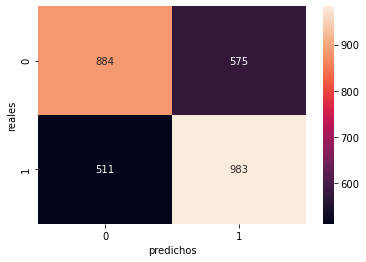

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='2g')
plt.ylabel('reales')
plt.xlabel('predichos')

In [122]:
coeficientes = pd.DataFrame(list(zip(abs(logreg.coef_[0]),X.columns))).sort_values(by=0,ascending=False)

In [123]:
coeficientes.rename(columns={0:'coef',1:'feature'},inplace=True)

In [124]:
coeficientes.head(10)

,coef,feature
1,0.582229,Pts_dif_AB
0,0.267212,Rank_dif_AB
4,0.121435,games_won_last_5_player_a
7,0.111217,games_won_last_5_player_b
10,0.092254,A_win_rate_vs_B
11,0.080681,B_win_rate_vs_A
15,0.073513,dif_height_AB
3,0.049157,games_won_last_3_player_a
6,0.048874,games_won_last_3_player_b
13,0.041834,B_won_last


## Entrenando KNN

In [125]:
def scores_knn(X, y, start,stop,step):
    
    # Vamos a querer graficar los distintos valores del score de cross validation en función del hiperparámetro n_neighbors
    # Para esto vamos a generar una lista de diccionarios que después se puede convertir fácilmente en DataFrame
    
    # Lista de diccionarios - la inicializamos vacío y por fuera del for loop para ir alimentándola en cada iteración
    scores_para_df = []
    
    
    for i in range(start,stop,step):
        
        # En cada iteración, instanciamos el modelo con un hiperparámetro distinto
        model = KNeighborsClassifier(n_neighbors=i)

        # cross_val_scores nos devuelve un array de 5 resultados, uno por cada partición que hizo automáticamente CV
        kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=10)
        cv_scores = cross_val_score(model, X, y, cv=kf)

        # Para cada valor de n_neighbours, creamos un diccionario con el valor de n_neighbours y la media y el desvío de los scores
        dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}

        # Guardamos cada uno en la lista de diccionarios
        scores_para_df.append(dict_row_score)
    
    # Creamos el DF a partir de la lista de resultados
    df_scores = pd.DataFrame(scores_para_df)
    
    # Incorporamos los límites inferior y superior, restando y sumando el valor del desvío estándar, respectivamente
    df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
    df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']
    
    # Retornamos el DF
    return df_scores

In [126]:
from sklearn.neighbors import KNeighborsClassifier
#Probamos de 1 a n vecinos
k_n = 40
df_scores= scores_knn(X_train_scaled, y_train, 1, k_n, 1)
df_scores

# El mejor vecino fue 34

,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
0,0.553511,0.011095,1,0.542416,0.564606
1,0.556784,0.005373,2,0.551410,0.562157
2,0.567509,0.014735,3,0.552774,0.582244
3,0.572029,0.015325,4,0.556703,0.587354
4,0.575976,0.016092,5,0.559884,0.592068
5,0.579249,0.011849,6,0.567401,0.591098
6,0.582974,0.020995,7,0.561979,0.603969
7,0.587152,0.017764,8,0.569388,0.604915
8,0.587830,0.018551,9,0.569279,0.606381
9,0.588731,0.023463,10,0.565268,0.612195


<div class="alert alert-block alert-success">
<b>Observación:</b>    
Va a depender de la cantidad de [neighbours] el tiempo de compilacion del modelo.
</div>

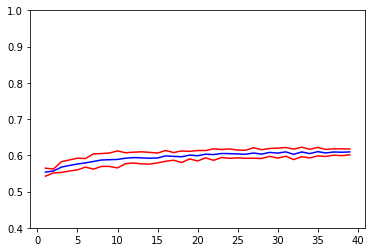

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Visualizamos los resultados

plt.plot(df_scores['n_neighbours'], df_scores['limite_inferior'], color='r')
plt.plot(df_scores['n_neighbours'], df_scores['score_medio'], color='b')
plt.plot(df_scores['n_neighbours'], df_scores['limite_superior'], color='r')
plt.ylim(0.4, 1);

#### Prediciendo sobre _test_

In [128]:
# Identificamos el score máximo
df_scores.loc[df_scores.score_medio == df_scores.score_medio.max()]

,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
34,0.610071,0.011707,35,0.598365,0.621778


In [129]:
# Asignamos el valor del k óptimo a una variableÇ
best_k = df_scores.loc[df_scores.score_medio == df_scores.score_medio.max(),'n_neighbours'].values[0]
print('- El mejor K:',best_k)

- El mejor K: 35


In [130]:
# Elegimos el modelo óptimo que nos había indicado cross validation
model = KNeighborsClassifier(n_neighbors=best_k)

# Lo ajustamos sobre datos de entrenamiento
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=35)

In [131]:
# Lo utilizamos para predecir en test
y_pred = model.predict(X_test_scaled)
y_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [132]:
# Computamos el accuracy score en test
accuracy_score(y_test, y_pred)

0.606501862512699

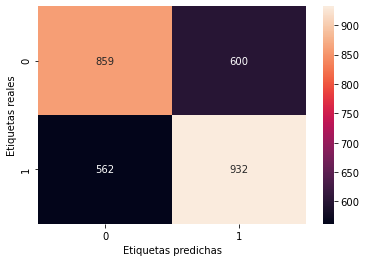

In [133]:
from sklearn.metrics import confusion_matrix

# Graficamos la matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

### Naive Bayes

In [134]:
from sklearn.naive_bayes import GaussianNB

In [135]:
classifier = GaussianNB()
classifier.fit(X_train_scaled, y_train)

GaussianNB()

In [136]:
model_accuracy_train=round((classifier.score(X_train_scaled, y_train)*100),2)
HTML(f'Model Accuracy en train : <b>{ model_accuracy_train }%</b>')

In [137]:
model_accuracy_test=round((classifier.score(X_test_scaled, y_test)*100),2)
HTML(f'Model Accuracy en test : <b>{ model_accuracy_test }%</b>')

#### - Matriz de Confusion

In [138]:
logreg = LogisticRegression(C = 0.01, 
                            penalty = 'l2', 
                            solver = 'lbfgs',random_state=1)
logreg.fit(X_train_scaled,y_train)
y_pred = logreg.predict(X_test_scaled)
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.6322384016254656


In [139]:
confusion = confusion_matrix(y_test, y_pred)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print('\nMatriz de Confusion:\n')
print(TN,FP)
print(FN,TP)


Matriz de Confusion:

884 575
511 983


- Importamos del módulo ``metrics`` la función `accuracy_score`, y lo aplicamos:

In [140]:
from sklearn.metrics import accuracy_score
print('Accuracy=>', accuracy_score(y_test, y_pred))

Accuracy=> 0.6322384016254656


In [141]:
print('Accuracy=', (TP+TN)/ (TP+TN+FP+FN))
print('Total de casos correctamente predichos (TP+TN) =',(TP+TN))
print('Total de casos (TP+TN+FP+FN) =',(TP+TN+FP+FN))

Accuracy= 0.6322384016254656
Total de casos correctamente predichos (TP+TN) = 1867
Total de casos (TP+TN+FP+FN) = 2953


In [142]:
y_test.value_counts(normalize=True)

1    0.505926
0    0.494074
Name: Target, dtype: float64

In [143]:
y_test.mean()

0.5059261767693871

In [144]:
1.0 - y_test.mean()

0.4940738232306129

### Métricas: Error de Clasificación

In [145]:
print('Error de clasificación=>',1 - accuracy_score(y_test, y_pred))

Error de clasificación=> 0.36776159837453437


### Métricas: Sensitivity (o recall)

- Importamos del módulo `metrics` la función `recall_score`, y lo aplicamos:

In [146]:
from sklearn.metrics import recall_score
print('Recall Score=>',recall_score(y_test, y_pred))

Recall Score=> 0.6579651941097724


In [147]:
print('Recall=', (TP)/ (TP+FN))
print('Total de casos positivos predichos correctamente (TP) =',(TP))
print('Total de casos positivos reales (TP+FN) =',(TP+FN))

Recall= 0.6579651941097724
Total de casos positivos predichos correctamente (TP) = 983
Total de casos positivos reales (TP+FN) = 1494


### Métricas: Specificity

In [148]:
specificity = TN / (TN + FP)

print('Scpecificity=>',specificity)

Scpecificity=> 0.6058944482522276


In [149]:
print('Specificity=', (TN)/ (TN+FP))
print('Total de casos negativos predichos correctamente (TN) =',(TN))
print('Total de casos negativos (TN+FP) =',(TN+FP))

Specificity= 0.6058944482522276
Total de casos negativos predichos correctamente (TN) = 884
Total de casos negativos (TN+FP) = 1459


### Métricas: Precision

- Importamos el módulo `metrics` la función `precision_score` y lo aplicamos:

In [150]:
from sklearn.metrics import precision_score
print('Precision=>',precision_score(y_test, y_pred))

Precision=> 0.6309370988446726


#### Métricas: False positive rate (FPR)

In [151]:
print('FPR, 1- specificity=>',1-specificity)

FPR, 1- specificity=> 0.3941055517477724


#### Métricas: F1-Score

- Importamos del módulo `metrics` la función `f1_score`, y lo aplicamos:

In [152]:
from sklearn.metrics import f1_score
print('F1 Score=>',f1_score(y_test,y_pred))

F1 Score=> 0.644167758846658


In [153]:
data_2.shape

(11811, 21)